In [12]:
import pandas as pd
import os
import re

density_list = ['고밀도', '중밀도', '저밀도']
speed_list = ['고속', '중속', '저속']
mode_list = ['기존', '제안']

node_dict = {
    '고밀도': {
        '고속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20],
        '중속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20],
        '저속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20],
    },
    '중밀도': {
        '고속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29],
        '중속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29],
        '저속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29],
    },
    '저밀도': {
        '고속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26],
        '중속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26],
        '저속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26],
    }
}


data = []

for density in density_list:
    for speed in speed_list:
        for mode in mode_list:
            base_path = f"C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/{density}/{speed}/{mode}/"
            
            nodes = node_dict[density][speed]

            for node_id in nodes:
                file_path = os.path.join(base_path, str(node_id), "aodv_routing_log.csv")

                print(f"로딩 중: {file_path}")

                if not os.path.exists(file_path):
                    print(f"파일 없음: {file_path}")
                    continue

                try:
                    df = pd.read_csv(file_path, nrows=500)
                except Exception as e:
                    print(f"파일 로딩 실패: {file_path}, 에러: {e}")
                    continue

                def extract_node(x):
                    match = re.search(r'\[(\d+)\]', str(x))
                    return int(match.group(1)) if match else -1

                if 'Node' in df.columns:
                    df['Node'] = df['Node'].apply(extract_node)

                if 'New_LifeTime' in df.columns and 'Previous_LifeTime' in df.columns:
                    df['LifeTime_Change'] = df['New_LifeTime'] - df['Previous_LifeTime']
                else:
                    print(f"LifeTime 컬럼 없음: {file_path}")
                    continue

                for row in df.itertuples(index=False):
                    data.append([density, speed, mode, node_id, row.New_LifeTime, row.LifeTime_Change])

df_result = pd.DataFrame(data, columns=['Density', 'Speed', 'Method', 'Node', 'LifeTime', 'LifeTime_Change'])

print("데이터 로딩 완료")


로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/0\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/4\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/6\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/7\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/9\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/10\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/11\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/17\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/19\aodv_rout

In [11]:
df_result['Method']

0        기존
1        기존
2        기존
3        기존
4        기존
         ..
18495    기존
18496    기존
18497    기존
18498    기존
18499    기존
Name: Method, Length: 18500, dtype: object

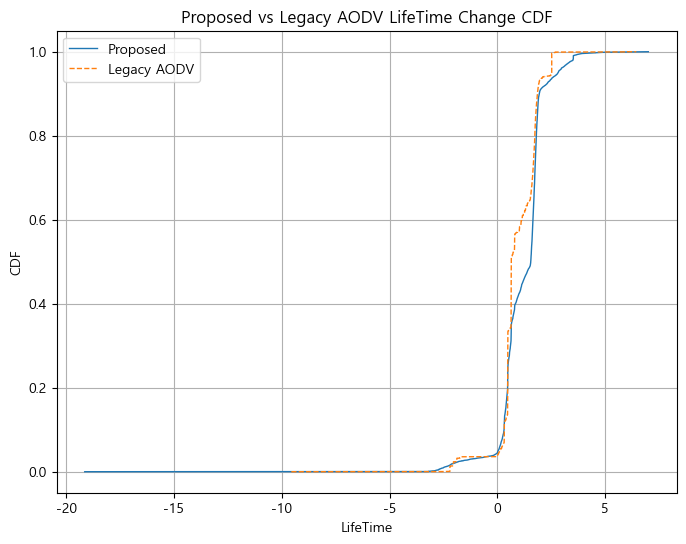

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df_proposed = df_result[df_result['Method'] == '제안']
df_baseline = df_result[df_result['Method'] == '기존']

life_proposed = df_proposed['LifeTime_Change'].values
life_baseline = df_baseline['LifeTime_Change'].values

def compute_cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf

x_proposed, cdf_proposed = compute_cdf(life_proposed)
x_baseline, cdf_baseline = compute_cdf(life_baseline)

plt.figure(figsize=(8, 6))
plt.plot(x_proposed, cdf_proposed, label="Proposed", linestyle='-', linewidth=1)
plt.plot(x_baseline, cdf_baseline, label="Legacy AODV", linestyle='--', linewidth=1)
plt.xlabel("LifeTime")
plt.ylabel("CDF")
plt.title("Proposed vs Legacy AODV LifeTime Change CDF")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
import pandas as pd
import os

density_list = ['고밀도', '중밀도', '저밀도']
speed_list = ['고속', '중속', '저속']

node_dict = {
    '고밀도': {'고속': [6, 7, 18, 21, 29, 33, 36, 44, 46],
              '중속': [6, 7, 18, 16, 33, 36, 29, 37, 38],
              '저속': [6, 7, 18, 33, 36, 29, 37, 46, 22]},
    
    '중밀도': {'고속': [6, 7, 17, 20, 24, 26, 27, 29, 36, 37],
              '중속': [6, 7, 17, 20, 24, 26, 27, 29, 36, 37],
              '저속': [6, 17, 18, 24, 26, 27, 29, 36, 37, 42]},
    
    '저밀도': {'고속': [6, 7, 17, 18, 20, 21, 22, 24, 25, 27],
              '중속': [6, 7, 17, 18, 20, 21, 22, 24, 29, 33],
              '저속': [7, 17, 18, 20, 21, 22, 24, 25, 27, 31]}
}

failure_data = {'기존': [], '제안': []}

base_dir = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/"

for density in density_list:
    for speed in speed_list:
        for mode in ['기존', '제안']:
            nodes = node_dict[density][speed]

            for node_id in nodes:
                node_path = os.path.join(base_dir, density, speed, mode, str(node_id))
                
                transmit_file = os.path.join(node_path, "transmitCount.txt")
                failed_file = os.path.join(node_path, "failedCount.txt")

                if not os.path.exists(transmit_file) or not os.path.exists(failed_file):
                    print(f"파일 없음: {transmit_file} 또는 {failed_file}")
                    continue

                try:
                    with open(transmit_file, 'r', encoding='utf-8') as f:
                        transmit_count = sum(1 for _, _ in zip(f, range(100000)))

                    with open(failed_file, 'r', encoding='utf-8') as f:
                        failed_count = sum(1 for _, _ in zip(f, range(100000)))

                    if transmit_count == 0:
                        print(f"파일이 비어 있음: {transmit_file}")
                        continue

                    failure_rate = (failed_count / transmit_count) * 100 if transmit_count > 0 else 0

                    failure_data[mode].append([density, speed, node_id, transmit_count, failed_count, failure_rate])

                    print(f"처리 완료: {node_path}, 실패율: {failure_rate:.2f}%")

                except Exception as e:
                    print(f"파일 처리 실패: {node_path}, 에러: {e}")
                    continue

df_existing = pd.DataFrame(failure_data['기존'], columns=['Density', 'Speed', 'Node', 'Transmit_기존', 'Failed_기존', 'FailureRate_기존'])
df_proposed = pd.DataFrame(failure_data['제안'], columns=['Density', 'Speed', 'Node', 'Transmit_제안', 'Failed_제안', 'FailureRate_제안'])

df_comparison = pd.merge(df_existing, df_proposed, on=['Density', 'Speed', 'Node'], how='outer')

df_comparison.fillna(0, inplace=True)

output_path = "failure_analysis_comparison.csv"
df_comparison.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"CSV 저장 완료: {output_path}")


처리 완료: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도\고속\기존\6, 실패율: 8.91%
처리 완료: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도\고속\기존\7, 실패율: 13.80%
파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도\고속\기존\18\transmitCount.txt 또는 C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도\고속\기존\18\failedCount.txt
파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도\고속\기존\21\transmitCount.txt 또는 C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도\고속\기존\21\failedCount.txt
파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도\고속\기존\29\transmitCount.txt 또는 C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도\고속\기존\29\failedCount.txt
파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도\고속\기존\33\transmitCount.txt 또는 C:/Users/Choe JongHyeon/Deskt

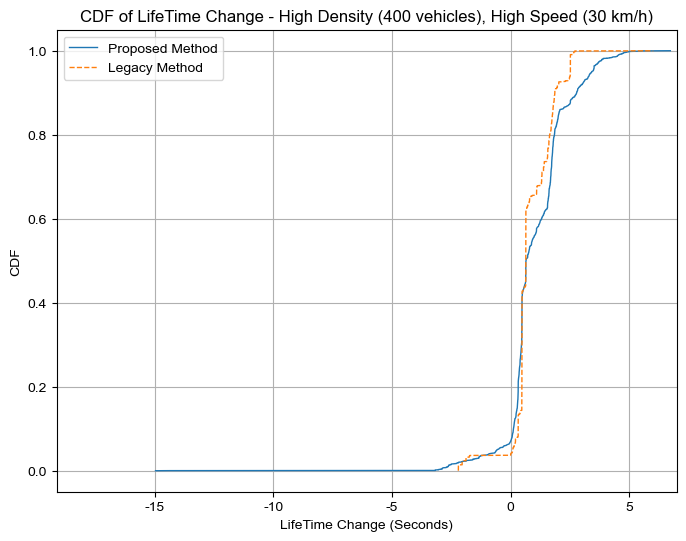

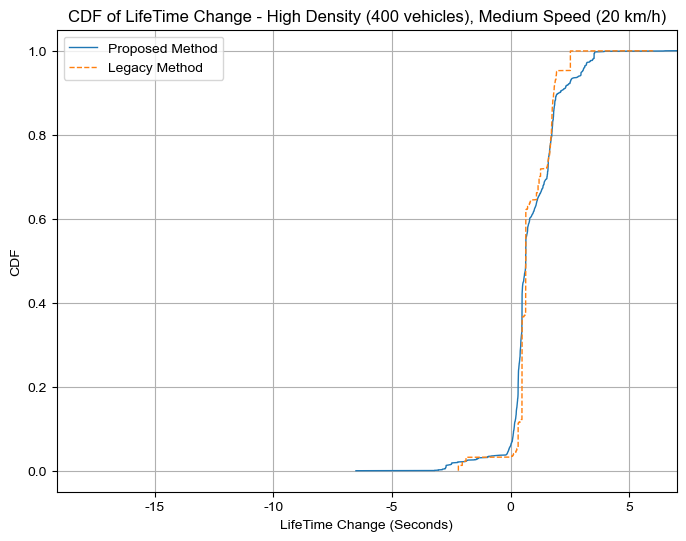

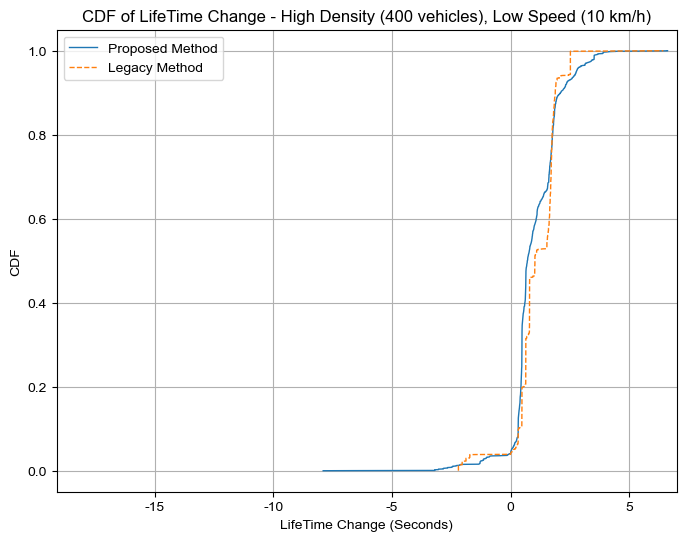

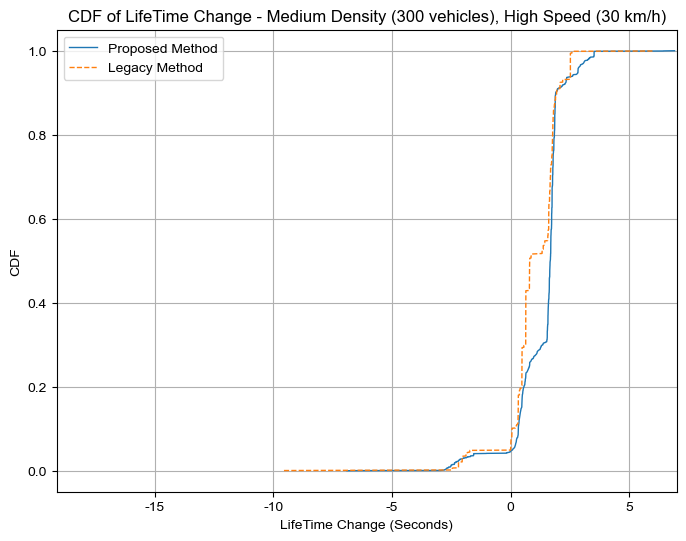

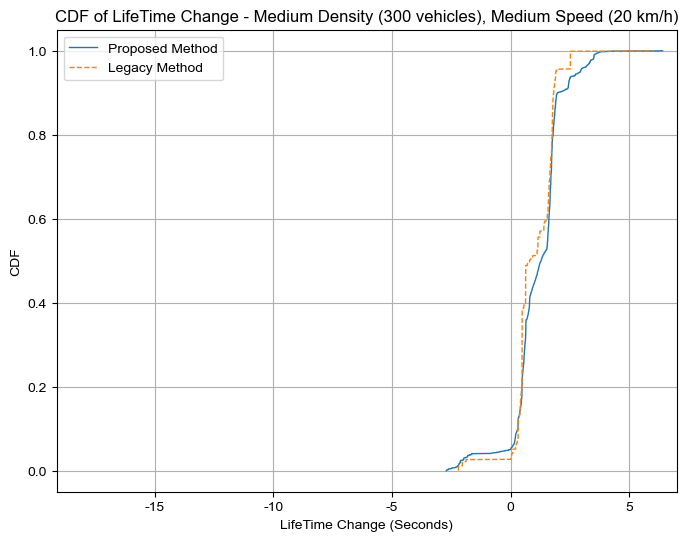

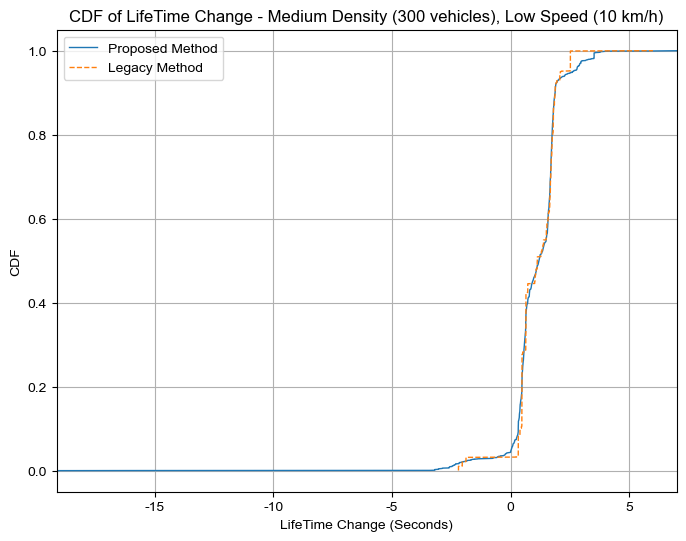

저밀도 - 고속: Insufficient data to generate CDF
저밀도 - 중속: Insufficient data to generate CDF
저밀도 - 저속: Insufficient data to generate CDF


In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False

def compute_cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf

density_translation = {
    "고밀도": "High Density (400 vehicles)",
    "중밀도": "Medium Density (300 vehicles)",
    "저밀도": "Low Density (200 vehicles)"
}

speed_translation = {
    "고속": "High Speed (30 km/h)",
    "중속": "Medium Speed (20 km/h)",
    "저속": "Low Speed (10 km/h)"
}

density_list = ["고밀도", "중밀도", "저밀도"]
speed_list = ["고속", "중속", "저속"]

min_value = df_result['LifeTime_Change'].min()
max_value = df_result['LifeTime_Change'].max()

for density in density_list:
    for speed in speed_list:
        df_filtered = df_result[(df_result['Density'] == density) & (df_result['Speed'] == speed)]

        df_proposed = df_filtered[df_filtered['Method'] == '제안']
        df_legacy = df_filtered[df_filtered['Method'] == '기존']

        if df_proposed.empty or df_legacy.empty:
            print(f"{density} - {speed}: Insufficient data to generate CDF")
            continue

        change_proposed = df_proposed['LifeTime_Change'].values
        change_legacy = df_legacy['LifeTime_Change'].values

        x_proposed, cdf_proposed = compute_cdf(change_proposed)
        x_legacy, cdf_legacy = compute_cdf(change_legacy)

        plt.figure(figsize=(8, 6))
        plt.plot(x_proposed, cdf_proposed, label="Proposed Method", linestyle='-', linewidth=1)
        plt.plot(x_legacy, cdf_legacy, label="Legacy Method", linestyle='--', linewidth=1)

        plt.xlabel("LifeTime Change (Seconds)")
        plt.ylabel("CDF")
        plt.xlim(min_value, max_value)

        density_english = density_translation.get(density, density)
        speed_english = speed_translation.get(speed, speed)
        plt.title(f"CDF of LifeTime Change - {density_english}, {speed_english}")

        plt.legend()
        plt.grid(True)
        plt.show()

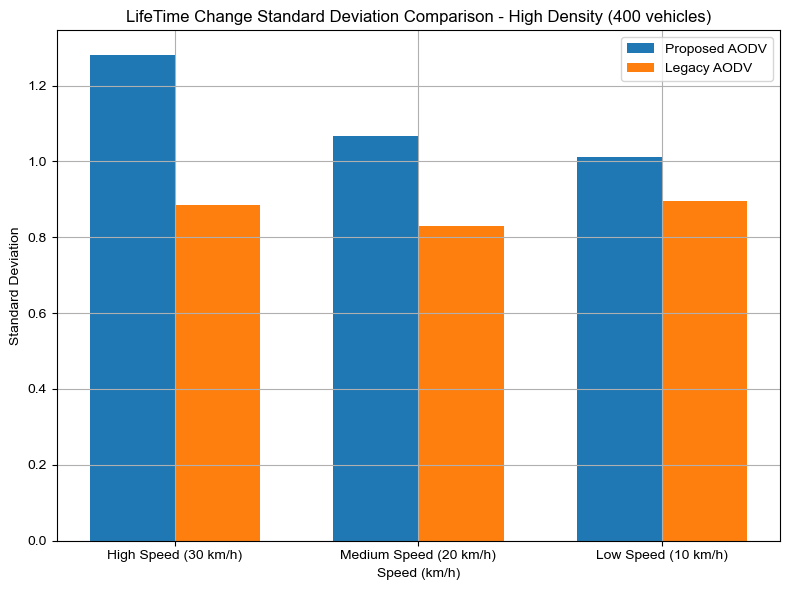

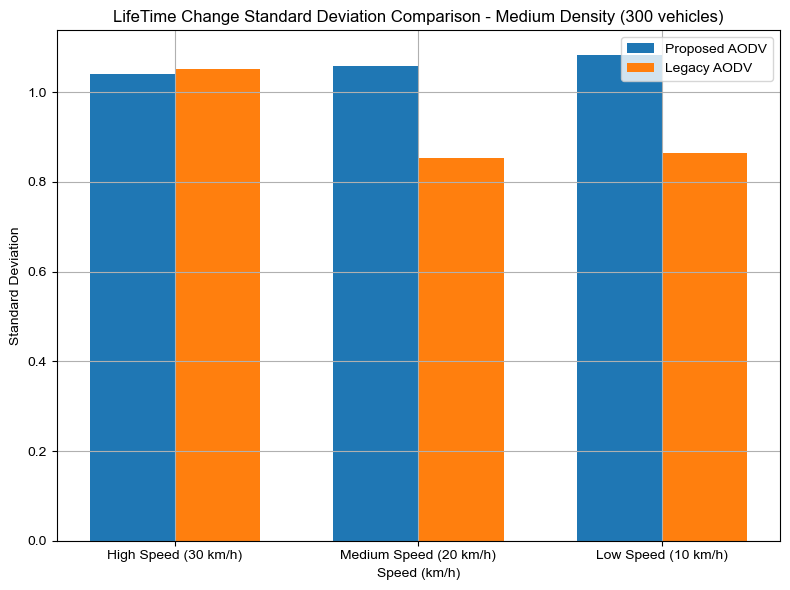

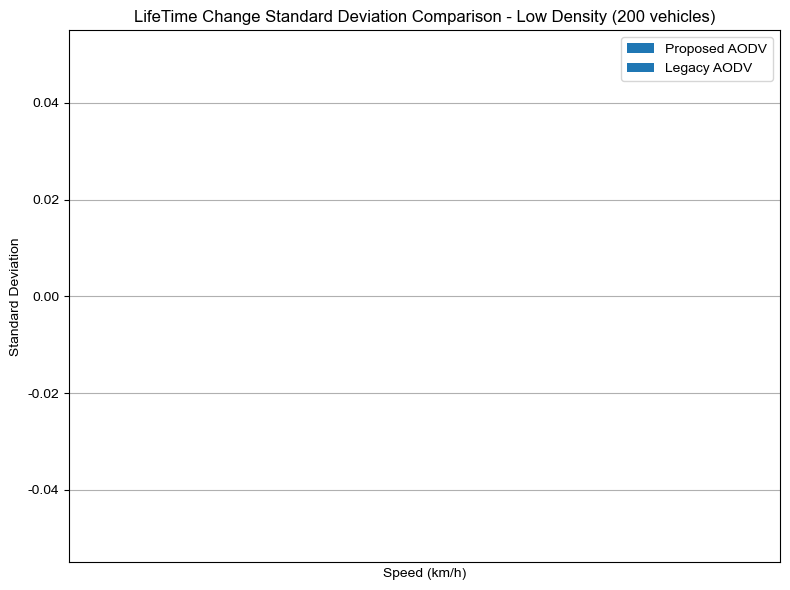

In [20]:
import matplotlib.pyplot as plt
import numpy as np

density_translation = {
    "고밀도": "High Density (400 vehicles)",
    "중밀도": "Medium Density (300 vehicles)",
    "저밀도": "Low Density (200 vehicles)"
}

speed_translation = {
    "고속": "High Speed (30 km/h)",
    "중속": "Medium Speed (20 km/h)",
    "저속": "Low Speed (10 km/h)"
}

for density in density_list:
    labels = []
    proposed_std = []
    legacy_std = []

    for speed in speed_list:
        df_filtered = df_result[(df_result['Density'] == density) & (df_result['Speed'] == speed)]
        df_proposed = df_filtered[df_filtered['Method'] == '제안']
        df_legacy = df_filtered[df_filtered['Method'] == '기존']

        if df_proposed.empty or df_legacy.empty:
            continue

        proposed_std.append(df_proposed['LifeTime_Change'].std())
        legacy_std.append(df_legacy['LifeTime_Change'].std())

        labels.append(speed_translation.get(speed, speed))

    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(8, 6))
    plt.bar(x - width/2, proposed_std, width, label='Proposed AODV')
    plt.bar(x + width/2, legacy_std, width, label='Legacy AODV')

    plt.xlabel('Speed (km/h)')
    plt.ylabel('Standard Deviation')

    density_english = density_translation.get(density, "Unknown Density")
    plt.title(f'LifeTime Change Standard Deviation Comparison - {density_english}')

    plt.xticks(x, labels)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


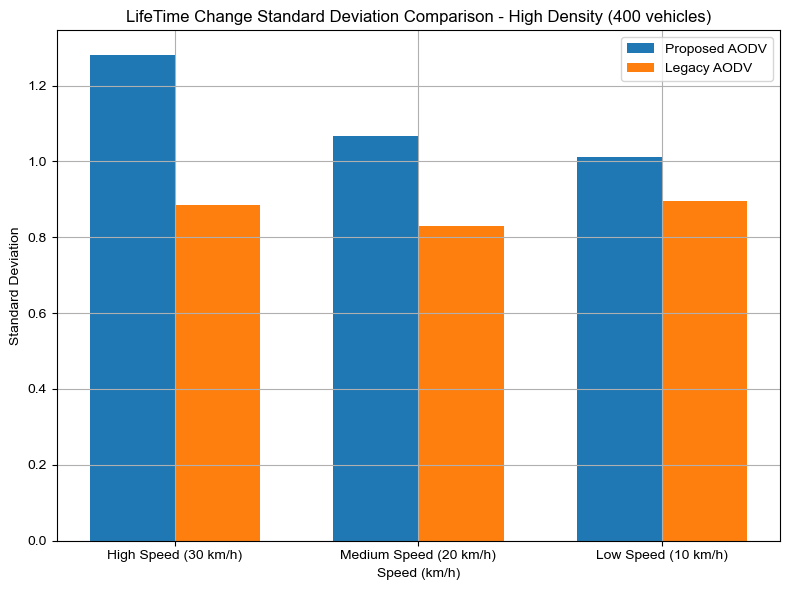

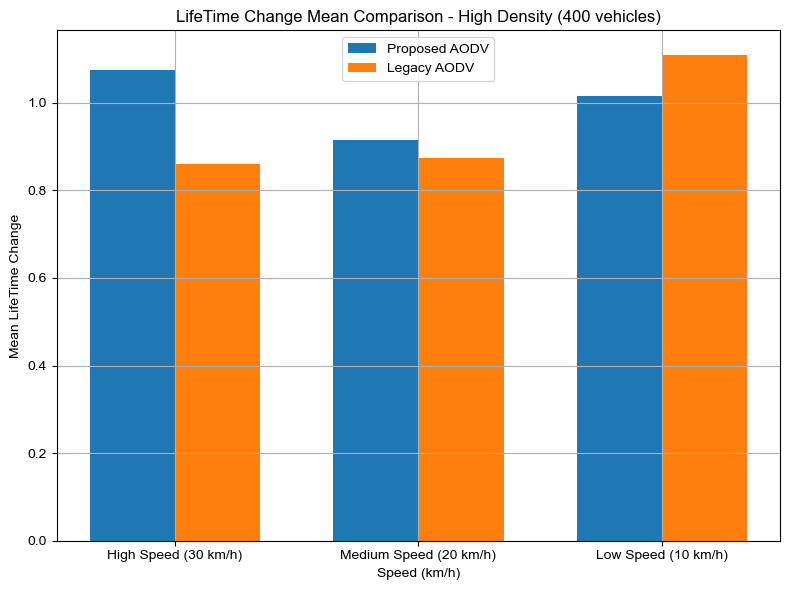

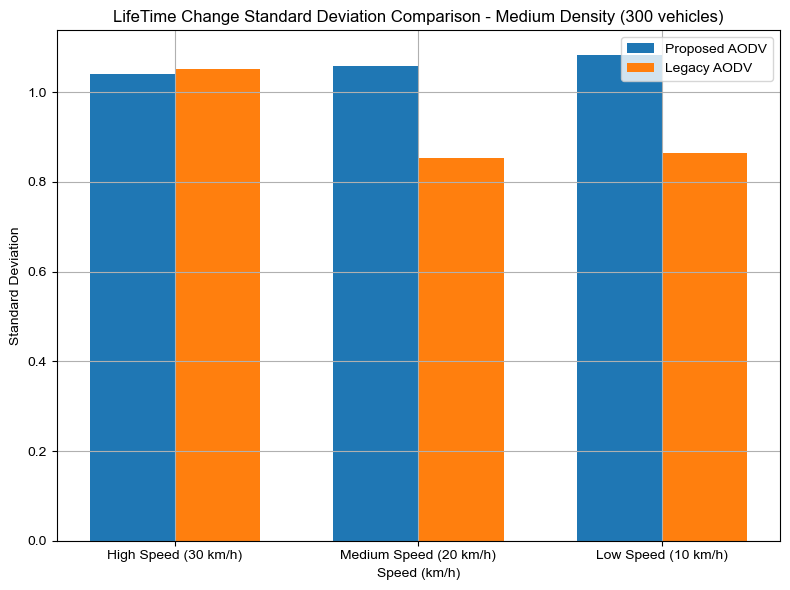

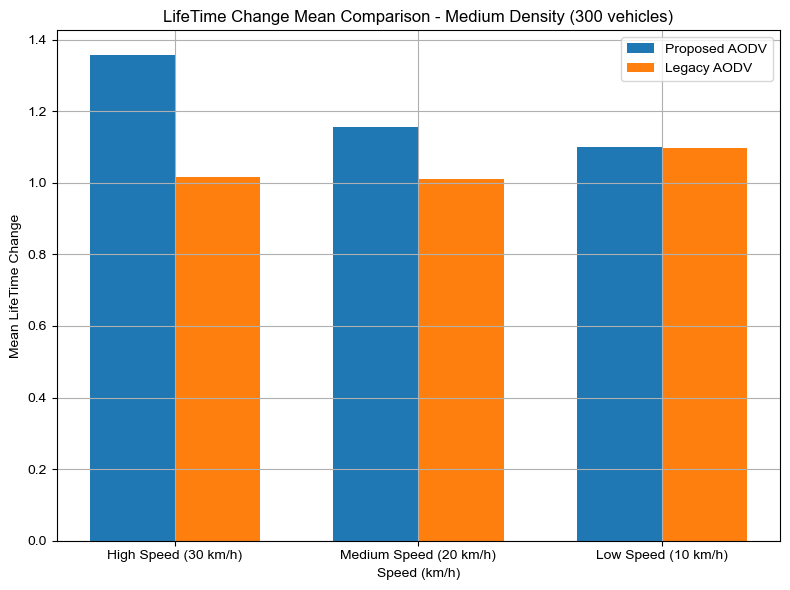

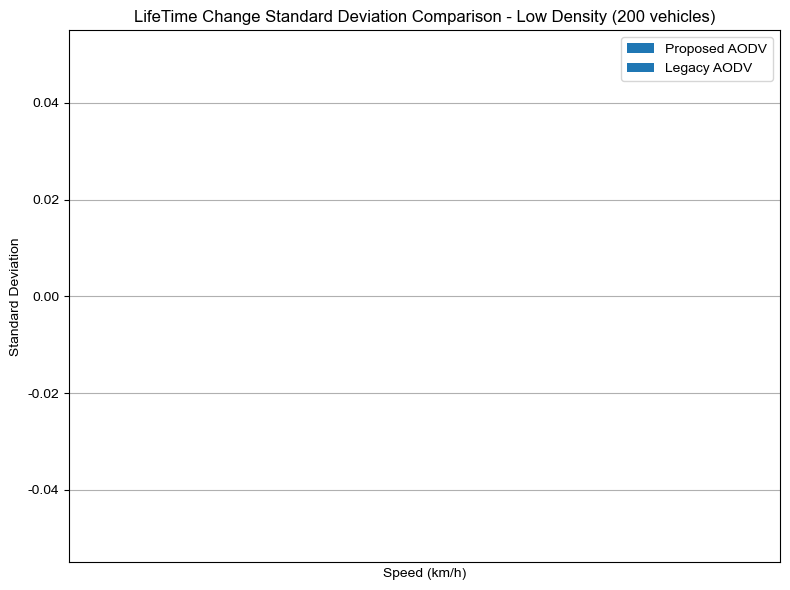

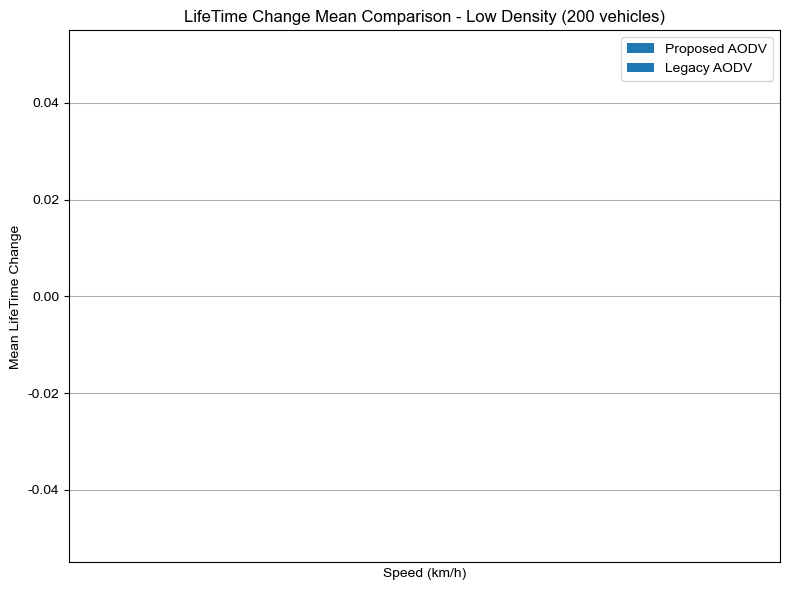

In [21]:
import matplotlib.pyplot as plt
import numpy as np

density_translation = {
    "고밀도": "High Density (400 vehicles)",
    "중밀도": "Medium Density (300 vehicles)",
    "저밀도": "Low Density (200 vehicles)"
}

speed_translation = {
    "고속": "High Speed (30 km/h)",
    "중속": "Medium Speed (20 km/h)",
    "저속": "Low Speed (10 km/h)"
}

for density in density_list:
    labels = []
    proposed_std = []
    legacy_std = []
    proposed_mean = []
    legacy_mean = []

    for speed in speed_list:
        df_filtered = df_result[(df_result['Density'] == density) & (df_result['Speed'] == speed)]
        df_proposed = df_filtered[df_filtered['Method'] == '제안']
        df_legacy = df_filtered[df_filtered['Method'] == '기존']

        if df_proposed.empty or df_legacy.empty:
            continue

        proposed_std.append(df_proposed['LifeTime_Change'].std())
        legacy_std.append(df_legacy['LifeTime_Change'].std())

        proposed_mean.append(df_proposed['LifeTime_Change'].mean())
        legacy_mean.append(df_legacy['LifeTime_Change'].mean())

        labels.append(speed_translation.get(speed, speed))

    x = np.arange(len(labels))
    width = 0.35

    # 표준편차 비교
    plt.figure(figsize=(8, 6))
    plt.bar(x - width/2, proposed_std, width, label='Proposed AODV')
    plt.bar(x + width/2, legacy_std, width, label='Legacy AODV')
    plt.xlabel('Speed (km/h)')
    plt.ylabel('Standard Deviation')
    density_english = density_translation.get(density, "Unknown Density")
    plt.title(f'LifeTime Change Standard Deviation Comparison - {density_english}')
    plt.xticks(x, labels)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 평균 비교
    plt.figure(figsize=(8, 6))
    plt.bar(x - width/2, proposed_mean, width, label='Proposed AODV')
    plt.bar(x + width/2, legacy_mean, width, label='Legacy AODV')
    plt.xlabel('Speed (km/h)')
    plt.ylabel('Mean LifeTime Change')
    plt.title(f'LifeTime Change Mean Comparison - {density_english}')
    plt.xticks(x, labels)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
